# Cap. 2 - Núcleo da Linguagem Python, Parte I

## **Objetos iteráveis**

Listas, tuplas e strings são exemplos de dados estruturados que podem ser iterados.

**Loops for**

Para iterar sobre os valores de objetos iteráveis podemos usar a sintaxe:



```
for ITEM in OBJETO_ITERAVEL:
    ITEM
```

Esse tipo de loop é muito característico do Python e também é muito diferente da maioria das linguagens, que usualmente requerem o uso de um índice ou contador. Por exemplo,

In [ ]:
lista_frutas = ['apple', 'melon', 'banana', 'orange']

for fruta in lista_frutas:
    print(fruta)

Note que a variável fruta definida no loop *for* "automaticamente" assume cada um dos valores da lista. Note também que o bloco interno ao loop for está identado com 4 espaços (**Esse é o padrão!**). Indentação em Python é parte da linguagem, seu uso incorreto resulta em erros. Veja abaixo:

In [ ]:
for fruta in lista_frutas:
    print(fruta)

In [ ]:
for fruta in lista_frutas:
    print(fruta)
print("teste.")

In [ ]:
for fruta in lista_frutas:
    print(fruta)
    print("teste.")

Podemos fazer loops dentro de loops:

In [ ]:
lista_frutas = ['apple', 'melon', 'banana', 'orange']

for fruta in lista_frutas:
    for letra in fruta:
        print(letra,end='.')
    print() #força um nova linha

No código anterior temos dois *for*. O primeiro itera sobre a lista de strings com os nomes das frutas. O segundo itera sobre as letras no nome de cada fruta.

**Gerador *range***

O Python fornece uma função para gerar sequências de números do tipo:

$$
a_n = a_0 + n d
$$
com $n=0,1,2,\dots$. Aqui $a_0$ é primeiro número da sequência e $d$ é o passo ou *stride*.

A sintaxe da função é:
```
range([a0=0],nmax,[stride=1])
```
na qual os colchetes indicam parâmetros opcionais.




In [ ]:
a = range(5)
a

Note que o objeto criado não é um lista e sim um *generator*. Isso significa que os valores são gerados ao serem acessados:

In [ ]:
a[2]

In [ ]:
a[:]

Você pode listar um gerador usando *list* ou *tuple*:

In [ ]:
list(a)

In [ ]:
tuple(a)

In [ ]:
list(range(1,6))

In [ ]:
list(range(0,6,2))

In [ ]:
#stride negativo gera uma sequência decrescente
list(range(10,-1,-2))

O range também pode ser usado em loops for:

In [ ]:
for i in range(5):
    print(i)

*Exemplo:* Maneira não pythonica de iterar um lista:

In [ ]:
lista_frutas = ['apple', 'melon', 'banana', 'orange']

for i in range(len(lista_frutas)):
    print(lista_frutas[i])

Não é preciso esforço para ver que o método anterior é muito mais "limpo":

In [ ]:
for fruta in lista_frutas:
    print(fruta)

Comentar que a variável fruta retém o último valor da iteração:

In [ ]:
fruta

*Exemplo E2.20:* [Sequência de Fibonacci](https://en.wikipedia.org/wiki/Fibonacci_sequence) é uma sequência (usualmente começando com 0 ou 1) na qual o $i$-ésimo termo é a soma dos dois termos anteriores:

$$
a_i = a_{i-1} + a_{i-2}
$$

Note que é preciso definir os dois primeiros termos: $a_0$ e $a_1$.

Supondo que $a_0=a_1=1$, escreva um código que gere uma lista com a sequência de Fibonacci até $i=n$.

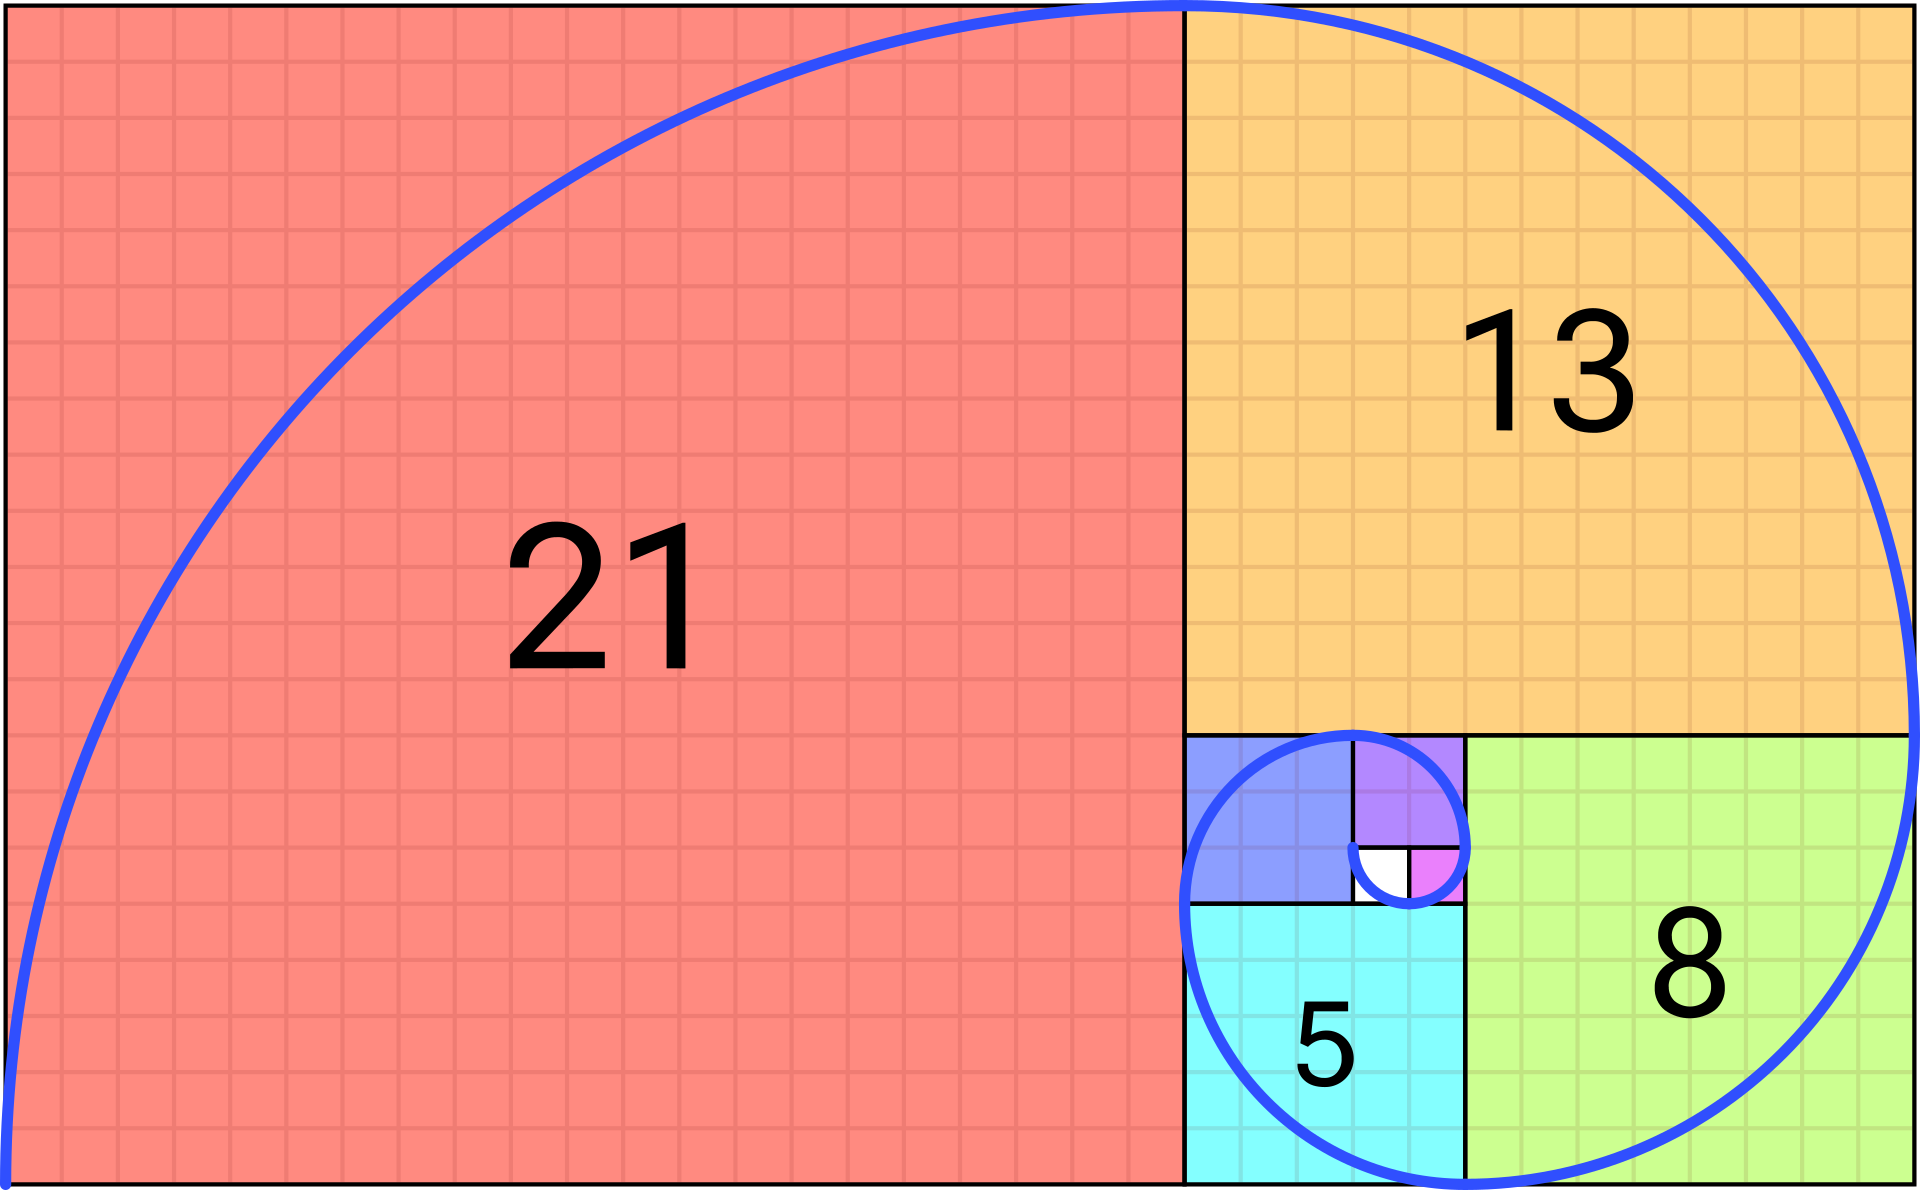

In [ ]:
n = 10

#define os dois primeiros termos
fib = [1, 1]

#o n+1 garante que vamos até n!
for i in range(2,n+1):
    fib.append(fib[i-1]+fib[i-2])

fib

Uma outra maneira, que apenas imprime os valores e usa tuplas para fazer os incrementos, seria:

In [ ]:
n = 10
a, b = 1, 1

print(a, b, end='')
for i in range(2,n+1):
    #a representa o valor anterior
    #b representa o valor atual
    a, b = b, a+b
    print('', b, end='')

**Gerador *enumerate***

Essa função toma um iterável e retorna um gerador contendo uma tupla para cada item com:


```
(contador, valor do item)
```

Veja:

In [ ]:
mammals = ['kangaroo', 'wombat', 'platypus']

teste = enumerate(mammals)

In [ ]:
list(teste)

In [ ]:
for i, mammal in enumerate (mammals):
    print(f"{i}: {mammal}")

**Função *zip***

A função *zip* "junta" e dois iteráveis permitindo varrê-los simultaneamente:

In [ ]:
a = [1, 2, 3, 4]
b = ['a', 'b', 'c', 'd']

par_ab = zip(a,b)

In [ ]:
par_ab

Diferentemente do range, não é possível acessar diretamente os valores de um zip (o mesmo vale para o enumerate):

In [ ]:
par_ab[0]

Se você quiser, embora não seja muito útil, você pode usar a função *next*

In [ ]:
next(par_ab)

In [ ]:
next(par_ab)

ou o listar todos com o list:

In [ ]:
list(zip(a,b))

O que acontece se as listas tiverem tamanhos diferentes?

In [ ]:
a = [1, 2]
b = ['a', 'b', 'c', 'd']
list(zip(a,b))

O uso mais natural é um loops:

In [ ]:
a = [1, 2, 3, 4]
b = ['a', 'b', 'c', 'd']

for par in zip(a,b):
    print(par)

In [ ]:
a = [1, 2, 3, 4]
b = ['a', 'b', 'c', 'd']

for v1,v2 in zip(a,b):
    print(v1)
    print(v2)
    print()

**Zip e unzip**

In [ ]:
z = zip(a,b)
list(z)

In [ ]:
list(zip(*z))

**Problema P2.4.7** [Lei de Benford](https://en.wikipedia.org/wiki/Benford%27s_law). Essa lei estabelece a frequência de ocorrência dos primeiros dígitos em números. Contrariamente ao que seria o senso comum, a ocorrência dos dígitos não é uniforme, ou seja, alguns dígitos são mais frequentes do que outros e seguem essa forma matemática:

$$
P(d) = \log_{10}\left( \frac{d+1}{d} \right)
$$
Aqui, $d=1,2,\dots,9$. Num gráfico, temos:

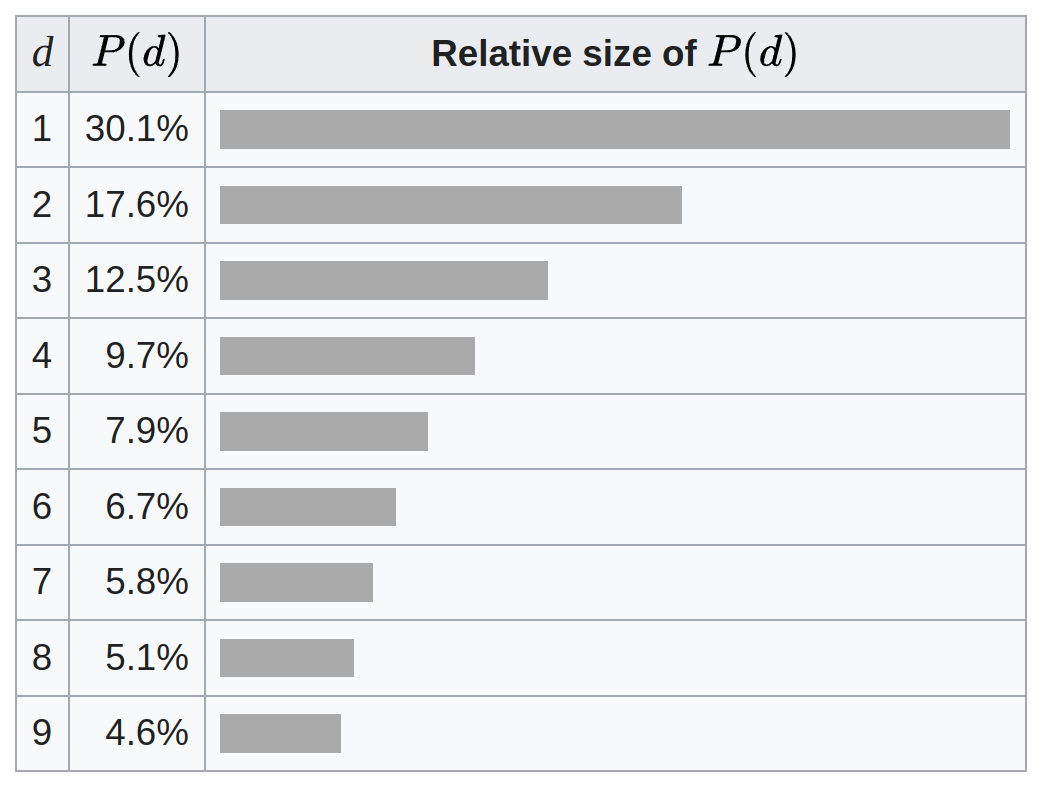

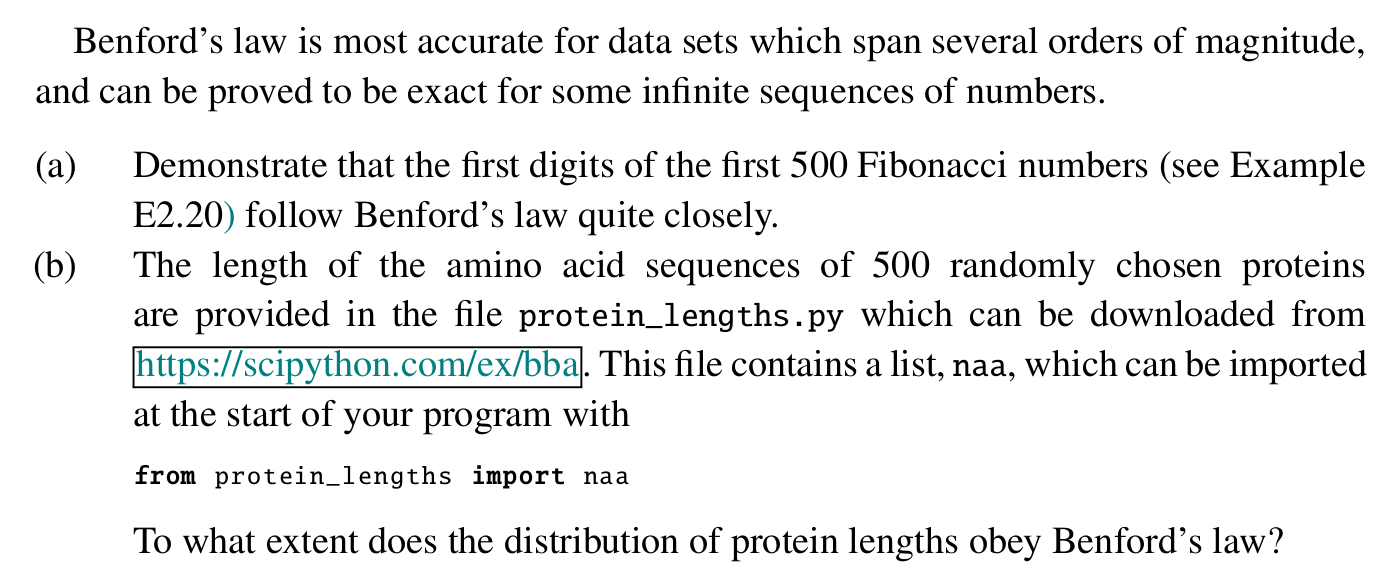

Começando pela parte (a), vamos usar um loop for para obter as previsões da Lei de Benford:

In [ ]:
import math
preds_benford = []

for d in range(1,9+1):
    v_ = math.log10((d+1)/d)
    preds_benford.append(v_)

In [ ]:
preds_benford

Suponha que nosso interesse é verificar essa lei para um conjunto de números. A primeira coisa que vamos precisar é extrair o primeiro dígito de um número inteiro.

In [ ]:
a = 237
int(str(a)[0])

Vamos usar os números de Fibonacci como dado para verificar a lei de Benford.

In [ ]:
n = 100
fib = [1, 1]

for i in range(2,n+1):
    fib.append(fib[i-1]+fib[i-2])

Para isso vamos criar uma lista contendo a frequência de cada dígito a ser estimada.

In [ ]:
fib_benford = [0]*9
fib_benford

Vamos, então, varrer a lista fib e verificar o primeiro dígito. Além disso, vamos somar 1 na posição referente ao dígito na lista fib_benford.

In [ ]:
for num in fib:
    digito = int(str(num)[0])
    fib_benford[digito-1] += 1

In [ ]:
fib_benford

Agora, vamos normalizar a contagem.

In [ ]:
for i in range(len(fib_benford)):
    fib_benford[i] /= n

In [ ]:
fib_benford

Finalmente, podemos comparar com os valores esperados pela lei de Benford.

In [ ]:
for i, (pred, real) in enumerate(zip(preds_benford,fib_benford)):
    print(f"{i} -> {pred:.2f}, {real:.2f}")

In [ ]:
linesep = '+' + '-'*32 + '+'

print(linesep)
print('|Dígito | Previsão | Experimento |')
print(linesep)

for i, (pred, real) in enumerate(zip(preds_benford,fib_benford)):
    print(f"|{i+1:^6d} | {pred:^8.2f} | {real:^11.2f} |")
    print(linesep)

Juntando tudo:

In [ ]:
n = 100
fib = [1, 1]

#gera a lista fib com os número de Fibonacci
for i in range(2,n+1):
    fib.append(fib[i-1]+fib[i-2])

#lista contendo as frequências estimadas
fib_benford = [0]*9

#varre a lista fib contando os dígitos
for num in fib:
    digito = int(str(num)[0])
    fib_benford[digito-1] += 1

#normaliza a frequência
for i in range(len(fib_benford)):
    fib_benford[i] /= n

#imprime a comparação
linesep = '+' + '-'*32 + '+'

print(linesep)
print('|Dígito | Previsão | Experimento |')
print(linesep)

for i, (pred, real) in enumerate(zip(preds_benford,fib_benford)):
    print(f"|{i+1:^6d} | {pred:^8.2f} | {real:^11.2f} |")
    print(linesep)

Incluindo o erro relativo.

In [ ]:
n = 100
fib = [1, 1]

#gera a lista fib com os número de Fibonacci
for i in range(2,n+1):
    fib.append(fib[i-1]+fib[i-2])

#lista contendo as frequências estimadas
fib_benford = [0]*9

#varre a lista fib contando os dígitos
for num in fib:
    digito = int(str(num)[0])
    fib_benford[digito-1] += 1

#normaliza a frequência
for i in range(len(fib_benford)):
    fib_benford[i] /= n

#imprime a comparação
linesep = '+' + '-'*48 + '+'

print(linesep)
print('|Dígito | Previsão | Experimento | Erro relativo |')
print(linesep)

for i, (pred, real) in enumerate(zip(preds_benford,fib_benford)):
    print(f"|{i+1:^6d} | {pred:^8.2f} | {real:^11.2f} |", end='')
    print(f" {abs((pred-real)/real)*100:^12.0f}% |")
    print(linesep)

O que acontece ao aumentar n?

Podemos "encapsular" numa função.

In [ ]:
def benford_fibonacci(n=100):
    """
    Essa função gera uma sequência de Fibonacci e compara a
    frequência dos primeiros dígitos com a Lei de Benford.
    ---
    n (int): Tamanho da sequência de Fibonacci.
    ---
    Retorna: Nada
             Imprime na tela uma tabela comparando as frequências
             estimadas com os valores preditos.
    """
    fib = [1, 1]

    #gera a lista fib com os número de Fibonacci
    for i in range(2,n+1):
        fib.append(fib[i-1]+fib[i-2])

    #lista contendo as frequências estimadas
    fib_benford = [0]*9

    #varre a lista fib contando os dígitos
    for num in fib:
        digito = int(str(num)[0])
        fib_benford[digito-1] += 1

    #normaliza a frequência
    for i in range(len(fib_benford)):
        fib_benford[i] /= n

    #imprime a comparação
    linesep = '+' + '-'*48 + '+'

    print(linesep)
    print('|Dígito | Previsão | Experimento | Erro relativo |')
    print(linesep)

    for i, (pred, real) in enumerate(zip(preds_benford,fib_benford)):
        print(f"|{i+1:^6d} | {pred:^8.2f} | {real:^11.2f} |", end='')
        print(f" {abs((pred-real)/real)*100:^12.0f}% |")
        print(linesep)

In [ ]:
benford_fibonacci(n=100)

In [ ]:
benford_fibonacci(n=1000)

In [ ]:
benford_fibonacci(n=1000)

Na parte (b) do problema, vamos usar outra sequência de números relacionado ao comprimento do DNA de 500 proteínas.

In [ ]:
naa = [40055, 27711, 36332, 13309, 12808, 3425, 56868, 44400, 26557, 48423, 14844, 47584, 26641, 27510, 21004, 13527, 80355, 34317, 33004, 32609, 37652, 27852, 192897, 62837, 18936, 27551, 20574, 18708, 31629, 36769, 3394, 51287, 37785, 44999, 19053, 64524, 24274, 44360, 11626, 24942, 18248, 9086, 36636, 22415, 55285, 61596, 64841, 16850, 36145, 28193, 36236, 14643, 5064, 11241, 2890, 29797, 14445, 14332, 33444, 58127, 64262, 12374, 45264, 13555, 5026, 27469, 41704, 11652, 9654, 27854, 60503, 26307, 36306, 43643, 8511, 103416, 16914, 63771, 27967, 55336, 33749, 37857, 34322, 9149, 30535, 11454, 53351, 85349, 152093, 50425, 34097, 25820, 41280, 64104, 54594, 49515, 46720, 35481, 24628, 37274, 54113, 39747, 39373, 15803, 30657, 39552, 41612, 37797, 10416, 33914, 17017, 40889, 10288, 67021, 42538, 8436, 38042, 11930, 77894, 50805, 23632, 49670, 2614, 23954, 9860, 57545, 46826, 58679, 69640, 23940, 50590, 27693, 35705, 21997, 40607, 5414, 38285, 11261, 123691, 51860, 49265, 5125, 46084, 29732, 15568, 18376, 14352, 38818, 17392, 32460, 50364, 4421, 7161, 18344, 21850, 25299, 14129, 14530, 22150, 35136, 5170, 43089, 5748, 43761, 33491, 43027, 66908, 20856, 35835, 34878, 17926, 16568, 27354, 72621, 131102, 11916, 17526, 29761, 84144, 26944, 9300, 626, 23406, 62492, 4230, 4195, 5897, 10393, 64900, 25675, 29653, 20305, 6523, 26771, 13912, 38499, 44921, 9045, 44187, 1344, 7177, 32502, 37091, 88008, 22020, 6790, 15748, 19431, 56321, 5683, 20250, 20437, 29473, 44684, 25930, 30302, 14574, 136485, 35242, 49883, 23935, 1640, 33338, 1508, 70164, 36366, 70161, 36666, 36970, 39757, 82280, 37944, 40951, 27397, 69690, 35003, 66168, 87552, 126056, 57127, 40335, 63955, 125260, 14674, 21548, 14656, 21934, 7862, 24767, 10811, 32661, 46748, 25467, 58673, 11264, 60199, 18799, 6513, 2253, 36712, 22885, 17548, 29870, 37949, 15386, 62111, 51134, 1735, 18269, 82362, 34355, 13199, 16853, 39614, 46452, 13833, 53883, 37563, 36637, 22871, 39574, 30017, 1147, 13522, 44112, 36598, 12525, 10614, 15627, 44802, 47193, 53677, 61054, 12945, 42905, 2558, 331774, 6734, 21457, 51491, 37197, 13542, 16495, 109616, 31379, 17175, 76105, 27734, 25276, 14537, 38191, 22069, 41348, 34746, 35426, 39343, 37929, 47420, 28223, 27755, 27007, 30816, 15623, 98138, 42984, 46130, 12264, 21960, 40755, 98353, 12675, 100728, 57881, 27907, 25722, 18483, 17548, 53622, 71649, 13684, 33692, 96542, 35028, 19657, 12132, 16538, 101121, 19229, 25289, 22407, 72784, 19841, 22639, 81729, 53888, 82644, 49803, 23756, 17963, 42399, 8525, 56083, 37827, 83002, 32990, 20027, 7450, 12528, 10693, 34700, 24628, 25052, 30321, 52766, 13469, 25037, 22778, 27076, 18913, 12355, 60058, 41671, 64229, 79737, 30952, 81983, 11241, 26588, 30434, 34335, 75246, 7161, 42843, 2138, 58323, 19976, 29223, 13253, 15704, 43887, 15506, 42639, 13955, 78452, 33828, 24313, 40600, 21985, 14930, 88702, 57545, 17980, 32503, 35761, 161851, 40083, 41989, 3540, 75244, 21494, 96423, 41632, 34773, 10560, 98540, 27657, 10265, 22645, 65203, 30809, 48566, 59685, 36875, 7296, 11701, 118950, 35185, 15649, 52043, 13751, 36057, 55694, 71607, 143626, 15604, 16713, 24177, 158598, 19304, 13964, 42171, 29018, 50340, 36697, 26844, 36021, 56938, 11576, 33854, 55018, 64000, 36293, 27211, 6570, 102953, 31491, 47414, 37642, 14435, 20439, 22358, 19793, 17889, 29894, 21665, 8835, 24870, 33024, 39666, 31076, 44038, 23011, 21942, 35205, 13883, 19044, 42900, 38668, 85282, 54053, 14979, 18090, 65513, 32238, 39368, 34105, 68725, 53162, 24792, 104422]

Para isso, vamos adaptar nossa função para tomar como argumento a lista de números.

In [ ]:
def benford_lista(lista_numero):
    """
    Essa função compara a frequência dos primeiros dígitos
    de uma lista de números com a Lei de Benford.
    ---
    lista (list): Lista com os números.
    ---
    Retorna: Nada
             Imprime na tela uma tabela comparando as frequências
             estimadas com os valores preditos.
    """

    est_benford = [0]*9
    n = len(lista_numero)

    #varre a lista contando os dígitos
    for num in lista_numero:
        digito = int(str(num)[0])
        est_benford[digito-1] += 1

    #normaliza a frequência
    for i in range(len(est_benford)):
        est_benford[i] /= n

    #imprime a comparação
    linesep = '+' + '-'*48 + '+'

    print(linesep)
    print('|Dígito | Previsão | Experimento | Erro relativo |')
    print(linesep)

    for i, (pred, real) in enumerate(zip(preds_benford,est_benford)):
        print(f"|{i+1:^6d} | {pred:^8.2f} | {real:^11.2f} |", end='')
        print(f" {abs((pred-real)/real)*100:^12.0f}% |")
        print(linesep)

In [ ]:
benford_lista(naa)

Note que a discrepância é relativamente grande. Normalmente esses desvios ocorrem quando os números não são completamente aleatórios. Um outro uso da lei de Benford é [esse](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5504535/pdf/acp-13-121.pdf):

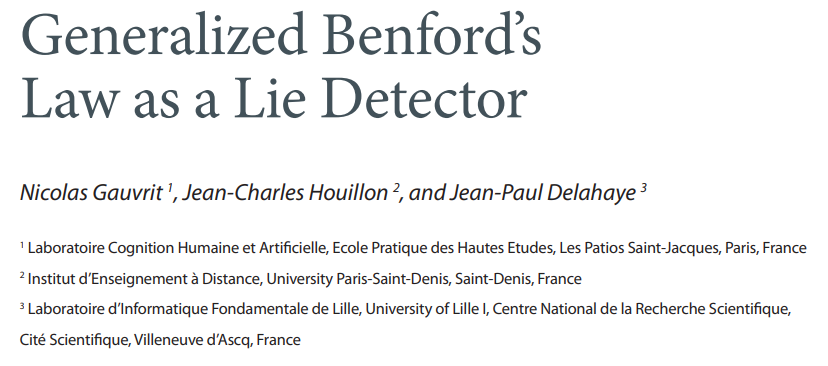

In [ ]:
lista_haroldo = [1,20,30,60,80,40,243,340,45,283,565,245,789,500,123,452,827,692,10124,785,1022,152,163,199,148,528,923]

In [ ]:
benford_lista(lista_haroldo)

## **Controle de Fluxo**

Em muitas situações, precisamos que blocos de código sejam executados condicionalmente com base em algum teste. Para isso, podemos usar a chamada construção *if-then-else* que está disponível em praticamente todas as linguagens de programação. No Python temos a construção:

*if ... elif ... else*

que tem a seguinte sintaxe:

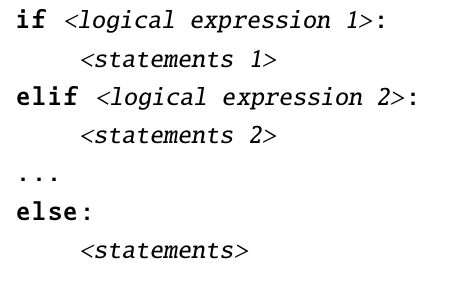

Os blocos de código \<statements _\> são executados quando as expressões lógicas equivalentes \<logical expression _\> retornam True. Caso nenhuma retorne True, o bloco \<statements\> é executado. Por exemplo:

In [ ]:
for x in range (10):
    if x <= 3:
        print(x, 'é menor ou igual a três.')
    elif x > 5:
        print(x, 'é maior que cinco.')
    else:
        print(x, 'deve ser 4 ou 5.')

Note que a indentação é mandatória assim como os ":".

Como em outros casos, as expressões lógicas não precisam retornar True ou False. Qualquer coisa que não seja 0 (int), 0. (float), '' (string vazia), [] (lista vazia), () (tupla vazia) ou o tipo especial None, vai ser considerado True.

Por exemplo:

In [ ]:
for x in range (10):
    if x % 2:
        print(x, 'é ímpar.')
    else:
        print(x, 'é par.')

O bloco que imprime "é ímpar" é executado sempre que o resto da divisão pode 2 não é zero (lembre-se, se não é zero é True). Caso contrário (zero, e, portanto False), é outro bloco que é executado.

*Exemplo E2.21:* [Ano bissexto](https://en.wikipedia.org/wiki/Leap_year) é um ano que conta com um dia a mais, o 366 dia (29 de fevereiro). Isso ocorre porque um ano astronômico (tempo de translação da Terra em volta do Sol) dura um pouco mais que um ano-calendário ($\approx  365.2422$). Para corrigir isso, a cada quatro anos, temos um dia mais no calendário.

Uma maneira de determinar se um ano $Y$ é bissexto é:

* se é múltiplo de *400*;
* e se não é múltiplo de $100$.
* verificar se $Y$ é dividido por $4$;

O código abaixo verifica se um ano é bissexto.

In [ ]:
ano = 1900

if not ano%400:
    bissexto = True
elif not ano%100:
    bissexto = False
elif not ano%4:
    bissexto = True
else:
    bissexto = False

res = "é " if bissexto else 'não é'

print(f"O ano {ano} {res} bissexto")

Podemos ainda "encapsular" numa função.

In [ ]:
def verifica_bissexto(ano):
    if not ano%400:
        bissexto = True
    elif not ano%100:
        bissexto = False
    elif not ano%4:
        bissexto = True
    else:
        bissexto = False

    res = "é" if bissexto else 'não é'

    print(f"O ano {ano} {res} bissexto.")

In [ ]:
verifica_bissexto(1986)
verifica_bissexto(2016)

**Loops while**

Enquanto um *for* itera sobre os valores de um iterável, um *while* vai repetir um procedimento enquanto uma dada condição for satisfeita. Vejamos um exemplo:

In [ ]:
i = 0

while i<10:
    print(i)
    i += 1

No código anterior, inicializamos um contador (*i=0*) e incrementamos seu valor enquanto o contador é menor que 10.

**break, continue, pass and else**

* *break* é usado para terminar um loop imediatamente:

In [ ]:
x = 0
while True:
    x += 1
    if not (x % 15 or x % 25):
        print(x, 'é divisível por 15 e 25.')
        break

In [ ]:
#verifica a posição do primeiro número<0
alist = [0, 4, 5, -2, 5, 10]
for i, a in enumerate (alist):
    if a < 0:
        print(a, 'na posição', i)
        break

* *continue* é usado para forçar o loop ir para o próximo valor:

In [ ]:
for i in range(1, 11):
    #se o resto for diferente de zero (true)
    #o número é ímpar e o continue avança 1 no range
    if i % 2:
        continue
    #só vai passar aqui caso o resto seja zero (false)
    print(i, 'é par.')

* *pass* é usado quando queremos que nada aconteça:

In [ ]:
for i in range (1, 11):
    if i==6:
        #o pass não faz nada e o código segue
        #para a próxima linha
        pass
    if not i%3:
        print(i,'é divisível por 3.')

* *else* combinado com *for* ou *while* é executado quando esses *loops* terminam naturalmente:

In [ ]:
#verifica a posição do primeiro número<0
alist = [0, 4, 5, -2, 5, 10]
for i, a in enumerate (alist):
    if a < 0:
        print(a, 'na posição', i)
        break
else:
    print('não existem números negativos na lista')

In [ ]:
#verifica a posição do primeiro número<0
alist = [0, 4, 5, 2, 5, 10]
for i, a in enumerate (alist):
    if a < 0:
        print(a, 'na posição', i)
        break
else:
    print('Não existem números negativos na lista.')

Como um outro exemplo, podemos encontrar o maior divisor de um número:

In [ ]:
a = 1013
b = a - 1

while b != 1:
    if not a % b:
        print('o maior divisor de ', a, 'é ', b)
        break
    b -= 1
else:
    #entra aqui apenas quando o código
    #não passa pelo break.
    print(a, 'é primo.')

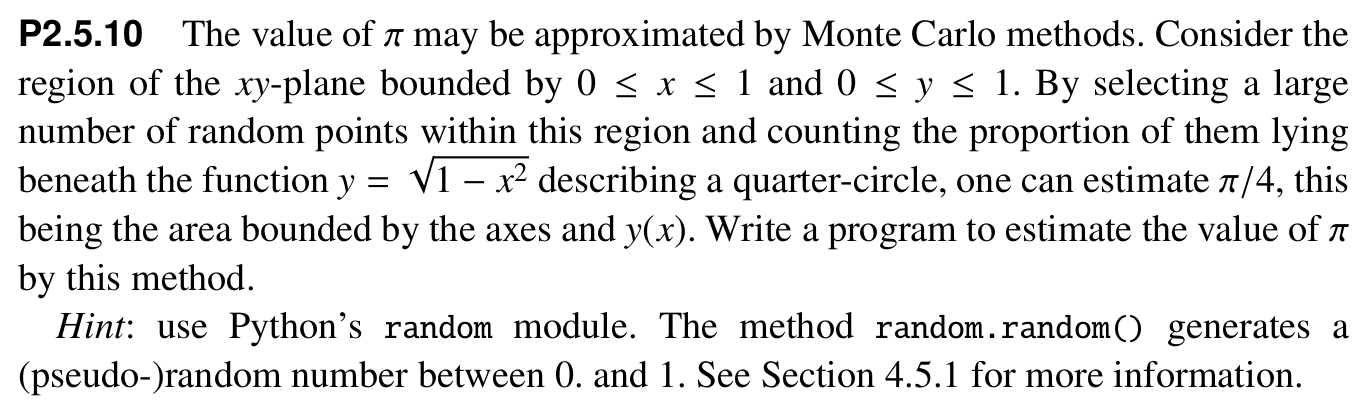

Vou considerar um pouco diferente e assumir que o círculo está centrado na origem e tem raio $r$.

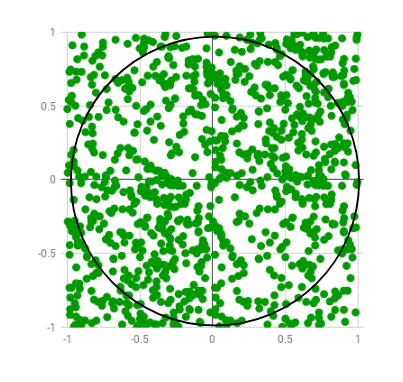

* a área do círculo é $\pi r^2$;
* a área do círculo é $(2r)^2=4r^2$;

Logo a probabilidade $P_\circ$ de ponto aleatório $\vec{a}=(x,y)$ cair dentro do círculo é a razão entre as áreas:

$$
P_\circ = \frac{\pi r^2}{4r^2} = \frac{\pi}{4}
$$

Essa probabilidade pode ser aproximada calculando a razão entre o número de pontos dentro do círculo ($N_{\circ}$) e dentro do quadrado  ($N_{\square}$):

$$
P_\circ = \frac{N_{\circ}}{N_{\square}}
$$

Sendo assim, podemos igualar as duas expressões anteriores e escrever:

$$
\frac{\pi}{4} = \frac{N_{\circ}}{N_{\square}}
$$
ou também:

$$
\pi = 4\frac{N_{\circ}}{N_{\square}}
$$

Note que os resultados não dependem do raio $r$.

Além disso, se o número total de pontos for $N$ e círculos estiver inscrito no quadrado (como na figura anterior), temos que

$$
\pi = 4\frac{N_{\text{in}}}{N}
$$
uma vez que todos os pontos estarão dentro do quadrado.

Vamos fazer um programa que simule esses pontos aleatórios usando um módulo que veremos mais adiante, o *numpy*.

In [ ]:
import numpy as np

In [ ]:
np.random.uniform()

In [ ]:
np.random.uniform(size=(2))

In [ ]:
np.random.uniform(low=-1, high=1, size=(2))

In [ ]:
#condição para estar dentro do círculo
teste = np.asarray([0.5,-0.5])
np.sqrt(np.sum(teste**2))<=1

In [ ]:
#condição para estar dentro do círculo
teste = np.asarray([1.0,-0.5])
np.sqrt(np.sum(teste**2))<=1

In [ ]:
def dentro_do_circulo(a):
    return np.sqrt(np.sum(a**2))<=1

In [ ]:
teste = np.asarray([1.0,-0.5])

dentro_do_circulo(teste)

In [ ]:
teste = np.random.uniform(low=-1, high=1, size=(2))
print(teste)
dentro_do_circulo(teste)

In [ ]:
def dentro_do_circulo(a):
    return np.sqrt(np.sum(a**2))<=1

n = 1000000
n_in = 0

#normalmente usamos _ para uma variável
#que não será usada
for _ in range(n):
    ponto = np.random.uniform(low=-1, high=1, size=(2))
    if dentro_do_circulo(ponto):
        n_in+=1

pi_est = 4*n_in/(n)

In [ ]:
pi_est

## **Escrita e leitura de arquivos**

Em muitas situações é preciso salvar resultados de programas em arquivos no disco do computador, os quais poderão ser usados novamente. Para lidar com arquivos o Python tem o objeto *file*.

Para abrir um arquivo, podemos usar:

```
f = open('NOME_DO_ARQUIVO.txt', 'w')
```
Aqui o 'w' representa o *mode* de abertura do arquivo. Temos as seguintes possibilidades mais comuns:

* 'r': (padrão) apenas leitura;
* 'w': para escrita. Cria o arquivo caso não exista ou sobrescreve um arquivo já existente;
* 'x': para escrita. Cria o arquivo caso não exista e retorna erro caso o arquivo já exista.
* 't': (padrão) arquivo em modo texto;
* 'b': arquivo em modo binário;
* 'r+': abre um arquivo para leitura e escrita. Retorna erro caso o arquivo não exista;
* 'w+': abre um arquivo para leitura e escrita. Cria um arquivo caso não exista ou sobrescreva caso já exista;
* 'a': apenas escrita. Cria o arquivo caso não exista e escreve no fim caso já exista;
* 'a+': leitura e escrita. Cria o arquivo caso não exista e escreve no fim caso já exista.




In [ ]:
f = open('meu_arquivo.txt','w')

Para fechar o arquivo usamos:

In [ ]:
f.close()

Também é muito comum abrir arquivos com a construção *with*:

In [ ]:
with open('meu_arquivo_2.txt','w') as f2:
    pass

Nesse caso, não é preciso fechar o arquivo. O Python se encarrega disso ao sair do bloco *with*.

Para escrever em um arquivo, podemos usar:

```
FILE.write(...)
```
ou a função *print*:
```
print(..., file=FILE)
```

Por exemplo:


In [ ]:
with open('meu_arquivo_2.txt','w') as f2:
    f2.write('teste 1')
    f2.write('teste 2')

Note que o método *write* não inclui linhas novas.

In [ ]:
with open('meu_arquivo_3.txt','w') as f2:
    f2.write('teste 1\n')
    f2.write('teste 2')

In [ ]:
#a função print inclui novas linhas
with open('meu_arquivo_4.txt','w') as f2:
    print('Haroldo',file=f2)
    print('Física Computacional',file=f2)

*Exemplo E2.24:* Escrever as primeiras quatro potências de número entre 1 e 1000 separadas por ",":

In [ ]:
with open('potencias.txt','w') as f:
    for i in range(1,1000+1):
        print(i,i**2,i**3,i**4,sep=', ',file=f)

Para ler todas as linhas de um arquivo podemos fazer:

In [ ]:
# i = 0
with open('potencias.txt','r') as f:
    for line in f.readlines():
        print(line)
        # i+=1
        # if i>10:
        #     break

Na prática, acaba sendo mais comum usar funções de módulos como o *numpy* ou *pandas* para escrever e ler dados estruturados.

##**Funções**

Funções nada mais são do que um conjunto de códigos agrupados e que podem ser executadas repetidas vezes. Funções servem para encapsular códigos para uso recorrente, além de contribuírem para simplificar programas, dividindo problemas complexos em partes mais simplificadas.

Para definir uma função usamos:



```
def NOME_DA_FUNCAO(ARG1,...):
   ...
```
Por exemplo:



In [ ]:
def quadrado(x):
    return x**2

In [ ]:
x = quadrado(2)

In [ ]:
x

Funções podem retornar nada ou mais de um valor. Por exemplo:

In [ ]:
def print_quadrado(x):
    print(x**2)

In [ ]:
print_quadrado(2)

In [ ]:
y=print_quadrado(2)

In [ ]:
y is None

In [ ]:
import math

def raizes(a,b,c):
    delta = b**2 -4*a*c
    r1 = (-b+math.sqrt(delta))/(2*a)
    r2 = (-b-math.sqrt(delta))/(2*a)

    return r1, r2


In [ ]:
raizes(1., -1., -6.)

In [ ]:
#o que acontece?
raizes(1., 1., 6)

**Docstrings**

São um texto que explica como usar a função. Existem várias maneiras tradicionais de usá-las:

In [ ]:
def raizes(a,b,c):
    """Retorna a raíz de $a x^2+bx+c=0$."""
    delta = b**2 -4*a*c
    r1 = (-b+math.sqrt(delta))/(2*a)
    r2 = (-b-math.sqrt(delta))/(2*a)

    return r1, r2

In [ ]:
??raizes

In [ ]:
?raizes

In [ ]:
raizes.__doc__

Além disso existem alguns templates que podem ser seguidos.

[**Estilo Google**](https://github.com/google/styleguide/blob/gh-pages/pyguide.md#38-comments-and-docstrings)



```
"""
This is an example of Google style.

Args:
    param1: This is the first param.
    param2: This is a second param.

Returns:
    This is a description of what is returned.

Raises:
    KeyError: Raises an exception.
"""
```

[**Estilo Numpydoc**](https://numpydoc.readthedocs.io/en/latest/)



```
"""
My numpydoc description of a kind
of very exhautive numpydoc format docstring.

Parameters
----------
first : array_like
    the 1st param name `first`
second :
    the 2nd param
third : {'value', 'other'}, optional
    the 3rd param, by default 'value'

Returns
-------
string
    a value in a string

Raises
------
KeyError
    when a key error
OtherError
    when an other error
"""
```



Mostrar um exemplo no [*ordpy*](https://github.com/arthurpessa/ordpy).

**Argumentos**

Na função *raiz(a,b,c)*, *a*, *b* e *c* são chamados argumentos posicionais pois eles foram passados em ordem

In [ ]:
def raizes(a,b,c):
    """Retorna a raíz de $a x^2+bx+c=0$."""
    delta = b**2 -4*a*c
    r1 = (-b+math.sqrt(delta))/(2*a)
    r2 = (-b-math.sqrt(delta))/(2*a)

    return r1, r2

In [ ]:
raizes(1., -1., -6.)

Podemos mudar isso, ao fazer:

In [ ]:
raizes(a=1., c=-6., b=-1.)

In [ ]:
raizes(b=-1., a=1., c=-6.)

Nesse caso, dizemos que estamos usando argumentos palavras-chave.

É possível misturar os dois tipo:

In [ ]:
raizes(1., c=-6., b=-1.)

Porém, argumentos posicionais deve ser sempre os primeiros:

In [ ]:
raizes(b=-1., 1., c=-6.)

**Argumentos com valor padrão ou argumentos opcionais**

Ao definir a função, se especificarmos o valor do argumento, esse valor será usado por padrão. Por exemplo:

In [ ]:
def imprime_comprimento(valor, unidade='metros'):
    return f'O comprimento é {valor:.2f} {unidade}'

In [ ]:
imprime_comprimento(10)

In [ ]:
imprime_comprimento(10,'quilômetros')

Argumentos *default* podem ser misturados, mas devem vir por último na definição da função.

In [ ]:
def imprime_comprimento(valor=1, unidade):
    return f'O comprimento é {valor:.2f} {unidade}'

Esses argumentos são definidos na primeira execução da função. Por exemplo:

In [ ]:
unidade_padrao = 'metros'
def imprime_comprimento(valor, unidade=unidade_padrao):
    return f'O comprimento é {valor:.2f} {unidade}'

In [ ]:
imprime_comprimento(10)

In [ ]:
unidade_padrao = 'km'
imprime_comprimento(10)

Note que ao mudar a variável *unidade_padrao* o argumento default não muda. Lembre-se, uma vez mais, que ao usar '=' um novo objeto é alocado na memória e as referências para o antigo objeto permanecem.

Porém, vale um alerta no caso de argumentos default mutáveis (listas, por exemplo):

In [ ]:
def func(alist = []):
    alist.append(7)
    return alist

In [ ]:
func()

In [ ]:
func()

In [ ]:
func()

Note que a cada execução, *alist* é incrementada. O método *.append* não cria uma nova lista.

**Escopo de variáveis**

Ao definir uma variável dentro de uma função, essa variável é dita *local* e fica disponível apenas dentro da função:

In [ ]:
b = 6 #exemplo de variável global

def func():
    a = 5 #exemplo de variável local
    print(a,b)

In [ ]:
func()

In [ ]:
a

Mesmo se você definir uma nova *a* de forma global, a variável *a* dentro da função não muda:

In [ ]:
a = 6

In [ ]:
a

In [ ]:
func()

O Python considera o escopo na ordem:



1.   **L**ocal;
2.   **E**nclosing (funções dentro de funções);
3.   **G**lobal;
4.   **B**uilt-ins (nomes reservados no Python).

Essas regras normalmente são denominadas: **LEGB**.


**Modificadores *global* e *nonlocal***



*   global VAR: define uma variável de escopo global;
*   nonlocal VAR: define uma variável de escopo *enclosing*.

Por exemplo,


In [ ]:
def func1():
    print(x)

In [ ]:
x = 4
func1()

In [ ]:
def func2():
    x = x + 1

In [ ]:
#x não pode ser modificada por estar definida no escopo global
func2()

In [ ]:
def func2():
    global x #isso faz com que o Python use o x global
    x = x + 1

In [ ]:
func2()

In [ ]:
x

**Passando argumentos para funções**

Em muitas linguagens (C e C++, por exemplo) existe uma distinção entre passar um argumento para função:

* por valor (*by value*)
* ou por referência (*by reference* ou ainda por ponteiros)

Em Python essa distinção não faz sentido, uma vez que a linguagem é "orientada por nome de objetos"(*name-object*).

Quando passamos o nome de um objeto (variável) como argumento de uma função, estamos sempre passando o seu valor (ou seja, estamos passando o id do objeto). Se a função será capaz de alterar ou não o seu valor depende apenas se o objecto é mutável ou imutável.

Por exemplo:



In [ ]:
def func1(a):
    print('func1: a = {}, id = {}'. format (a, id(a)))
    a = 7 #cria um a no escopo local da funcao
    print('func1: a = {}, id = {}'. format (a, id(a)))

In [ ]:
a = 3
print ('global : a = {}, id = {}'. format (a, id(a)))

In [ ]:
func1(a)

In [ ]:
print ('global : a = {}, id = {}'. format (a, id(a)))

Note que *func1(a)* imprime primeiro o valor global de *a*, mas depois que *a* (outro *a*) é definido dentro da função, ele passa a considerar o novo valor, que na verdade corresponde a outro objeto.

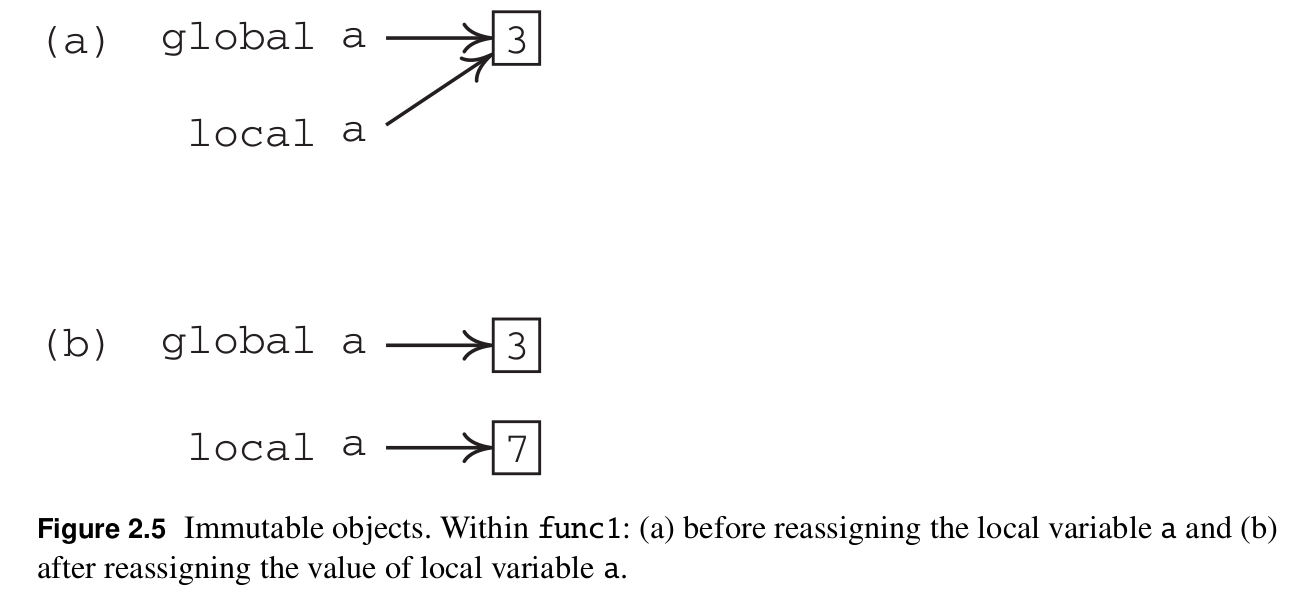

Se o objeto passado como argumento for mutável (lista, por exemplo), o comportamento é diferente:

In [ ]:
def func2(b):
    print('func2: b = {}, id = {}'. format (b, id(b)))
    b.append (7) # add an item to the list
    print('func2: b = {}, id = {}'. format (b, id(b)))

In [ ]:
c = [1, 2, 3]
print('global : c = {}, id = {}'. format (c, id(c)))

In [ ]:
func2(c)

In [ ]:
print('global : c = {}, id = {}'. format (c, id(c)))

Note que nesse caso, não existe diferença entre *c* ser local ou global.

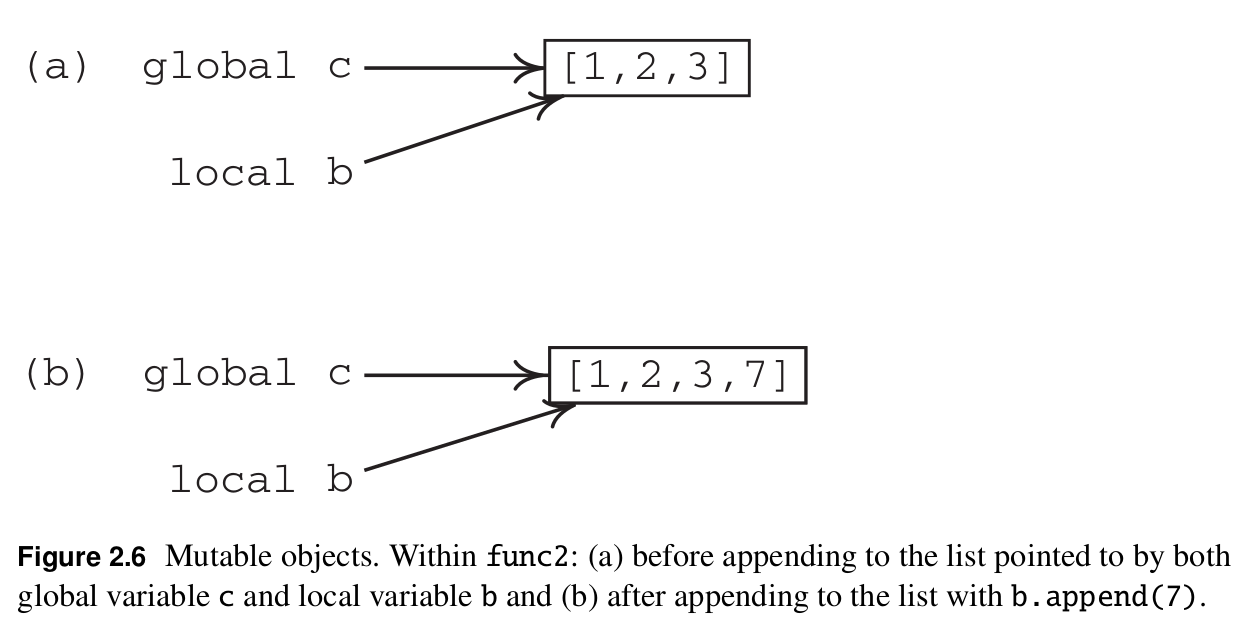

**Funções recursivas**


Funções recursivas são funções que chamam a si mesmas. Esse tipo de recurso normalmente não é necessário, mas torna mais elegante a solução de alguns problemas e costuma produzir códigos mais eficientes.

**Cuidado para não cair em loops infinitos!**

Um exemplo clássico é o cálculo do fatorial

$$
n!= n\times(n-1)\times(n-2)\dots\times(1)
$$

Note que a própria definição do fatorial implica que:

$$
\begin{align}
n! &= n\times(n-1)!\\
%(n-1)! &= (n-1)\times(n-2)!\\
%(n-2)! &= (n-2)\times(n-3)!\\
%&\vdots\\
\end{align}
$$
representando um recursão: conhecendo $(n-1)!$ podemos calcular $n!$.

Código não recursivo:


In [ ]:
def usual_fatorial(n):
    res = 1
    for i in range(1,n+1):
        res *= i
    return res

In [ ]:
usual_fatorial(5)

In [ ]:
def fatorial(n):
    #print('->',n)
    if n==1:
        return 1
    return n*fatorial(n-1)

In [ ]:
fatorial(5)

In [ ]:
%%timeit
usual_fatorial(8)

In [ ]:
%%timeit
fatorial(8)

Exemplo: Sequência de Fibonacci revisitada. Lembrando que:

$$
a_i = a_{i-1} + a_{i-2}
$$
com $a_0=a_1=1$.

In [ ]:
def fib_usual(n):
    a, b = 1, 1
    seq = [a,b]
    for i in range(2,n+1):
        a, b = b, a+b
        seq += [b]
    return seq

In [ ]:
fib_usual(10)

In [ ]:
def fib_recursiva(n):
    if n in (0,1):
        return 1
    return fib_recursiva(n-1)+fib_recursiva(n-2)

In [ ]:
fib_recursiva(3)

In [ ]:
[fib_recursiva(n) for n in range(10+1)]

In [ ]:
%%timeit
fib_usual(10)

In [ ]:
%%timeit
[fib_recursiva(n) for n in range(10+1)]

Note que nesse caso, a solução recursiva é muito mais lenta!

Isso ocorre porque cada ver que chamamos *fib_recursiva(n)* ela precisa calcular a sequência até $n$. Já a versão recursiva sempre salva o resultado anterior e por isso é muito mais eficiente.
